## Observations and Insights 

In [ ]:
#Oberservations and insights taken from this date:

#1. Male and female mouse reatio is equally distributed. 
#2. Infubinol has the only outlier in the data set. 
#3. Mouse weight and tumor volume have a postivie correlation. 



In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

from scipy import stats

drug_list=[]

# Study data files
mouse_metadata_path = "../Data/Mouse_metadata.csv"
study_results_path = "../Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()
#study_results.head()
# Combine the data into a single dataset

merged_data=pd.merge(mouse_metadata,study_results,how="outer", on = "Mouse ID")

# Display the data table for preview
merged_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice.
total_mice_count= len(merged_data["Mouse ID"])

print(total_mice_count)


1893


In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#find_duplicates= merged_data["Mouse ID"]["Timepoint"].unique()
find_duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mice_df = find_duplicates = merged_data.drop_duplicates(subset=['Mouse ID','Timepoint'])


In [22]:
# Checking the number of mice in the clean DataFrame.
len(unique_mice_df)

1888

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_mean=unique_mice_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_volume_median=unique_mice_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_volume_variance=unique_mice_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_volume_sd=unique_mice_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_volume_sem=unique_mice_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_name_tumor_df=pd.DataFrame({"Mean":tumor_volume_mean,"Median":tumor_volume_median,"Variance":tumor_volume_variance,"Standard Deviation":tumor_volume_sd,"SEM":tumor_volume_sem})

summary_name_tumor_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Treatment count per Drug Regimen'}, xlabel='Drug Names', ylabel='Number of Measurments'>

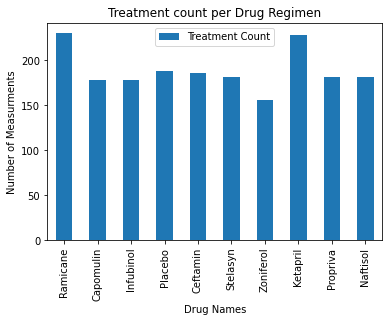

In [68]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_names=unique_mice_df["Drug Regimen"].unique()
treatment_count=unique_mice_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]
name_treatment = pd.DataFrame({"Drug Names":drug_names,"Treatment Count":treatment_count})
name_treatment.plot(kind='bar', x='Drug Names', y='Treatment Count',title = "Treatment count per Drug Regimen", ylabel = "Number of Measurments")

Text(0.5, 1.0, 'Treatments Per Drug Regimen')

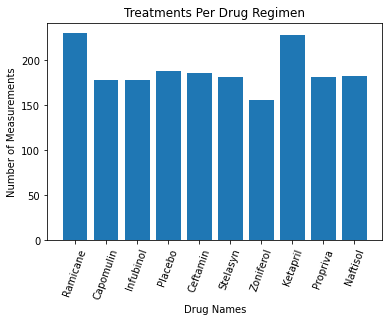

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(drug_names,treatment_count)
degrees = 70
plt.xticks(rotation=degrees)

plt.xlabel('Drug Names')
plt.ylabel('Number of Measurements')
plt.title('Treatments Per Drug Regimen')

<AxesSubplot:ylabel='Mouse ID'>

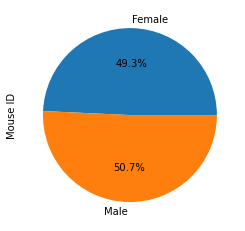

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_gender_df = unique_mice_df.groupby(['Sex']).count()

grouped_gender_df= grouped_gender_df["Mouse ID"]

grouped_gender_df.plot(kind='pie', y= "Mouse ID",autopct='%1.1f%%')

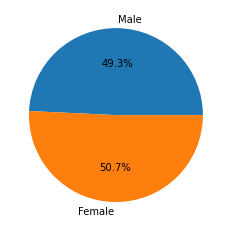

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

y = grouped_gender_df
labels=["Male","Female"]
plt.pie(y,labels = labels,autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_timepoint = unique_mice_df.groupby("Mouse ID").max()
max_timepoint = max_timepoint["Timepoint"].reset_index()
max_timepoint

tumor_volume_max_timepoint = max_timepoint.merge(unique_mice_df, how = "left", on = ["Timepoint","Mouse ID"] )


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_name = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
tumor_volume_at_max = []

for name in regimen_name:
    final_tumor = tumor_volume_max_timepoint.loc[tumor_volume_max_timepoint["Drug Regimen"]== name,"Tumor Volume (mm3)"]
    tumor_volume_at_max.append(final_tumor)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quantile = final_tumor.quantile([0.25,0.5,0.75])
    lower_quartile = quantile[.25]
    upper_quartile = quantile[.75]
 
    IQR = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    
    upper_bound = upper_quartile + 1.5*(IQR)
    lower_bound = lower_quartile - 1.5*(IQR)
    
    outliers = final_tumor.loc[(final_tumor > upper_bound) | (final_tumor < lower_bound)]
    
    print(f"The outlier for {name} is {outliers.values}")

The outlier for Capomulin is []
The outlier for Ramicane is []
The outlier for Infubinol is [36.3213458]
The outlier for Ceftamin is []


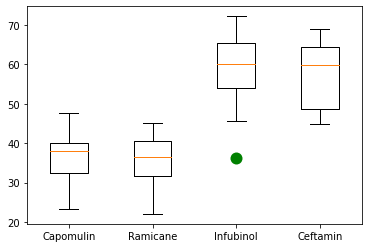

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_volume_at_max,labels = regimen_name, flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  markeredgecolor='none'))
plt.show()


## Line and Scatter Plots

<AxesSubplot:title={'center':'Mouse s185 Tumor Volume vs Timepoint'}, xlabel='Timepoint', ylabel='mm3'>

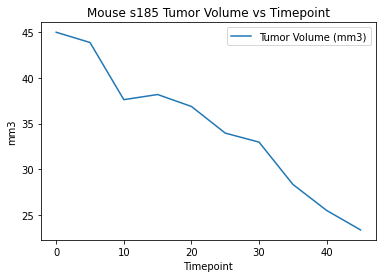

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


capomulin_df = unique_mice_df.loc[unique_mice_df["Drug Regimen"]=="Capomulin",:]

mouse_data = capomulin_df.loc[capomulin_df["Mouse ID"]=="s185",:]

#capomulin_df = capomulin_df.groupby(["Mouse ID"])

mouse_data.head(10)


labels =["Timpoint","Tumor Volume"]


mouse_data.plot(kind='line', x="Timepoint",y="Tumor Volume (mm3)", title= "Mouse s185 Tumor Volume vs Timepoint", ylabel = "mm3")


<AxesSubplot:title={'center':'Mouse Weight Vs. Tumor Volume'}, xlabel='Average Tumor', ylabel='Mouse Weight'>

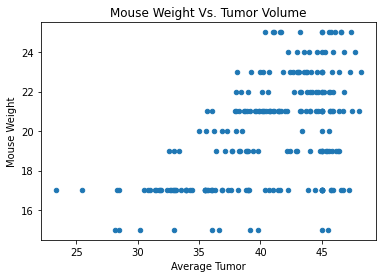

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_tumor_list = capomulin_df["Tumor Volume (mm3)"]
cap_weight = capomulin_df["Weight (g)"]

tumor_vs_weight = pd.DataFrame({"Average Tumor":cap_tumor_list,"Mouse Weight":cap_weight})
labels = ["Tumor Volume", "Mouse Wight"]

tumor_vs_weight.plot(kind='scatter', x='Average Tumor', y="Mouse Weight",title = "Mouse Weight Vs. Tumor Volume")


## Correlation and Regression

Text(0.5, 1.0, 'Tumor Volume vs. Mouse Weight')

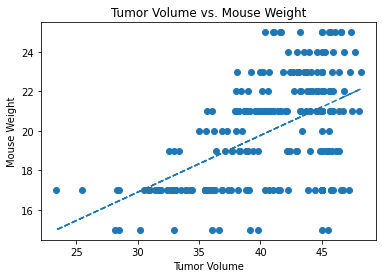

In [37]:
# Calculate the correlation coefficient and linear regression model 
# Perform a linear regression on temperature vs. latitude
x_value = tumor_vs_weight["Average Tumor"] 
y_value = tumor_vs_weight["Mouse Weight"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value , y_value)
regress_values = x_value * slope + intercept


m_fit = slope * x_value + intercept
plt.scatter(x_value,y_value)
plt.plot(x_value,m_fit,"--")
plt.xlabel('Tumor Volume')
plt.ylabel('Mouse Weight')
plt.title('Tumor Volume vs. Mouse Weight')


# for mouse weight and average tumor volume for the Capomulin regimen
